In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
medical_insurance = pd.read_csv('/content/insurance.csv')

In [3]:
medical_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_insurance.shape

(1338, 7)

In [5]:
medical_insurance.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [7]:
medical_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
medical_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 800x800 with 0 Axes>

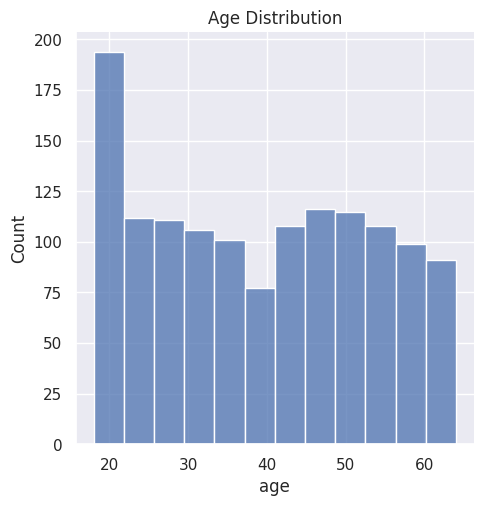

In [10]:
sns.set()
plt.figure(figsize=(8,8))
sns.displot(medical_insurance['age'])
plt.title('Age Distribution')
plt.show()

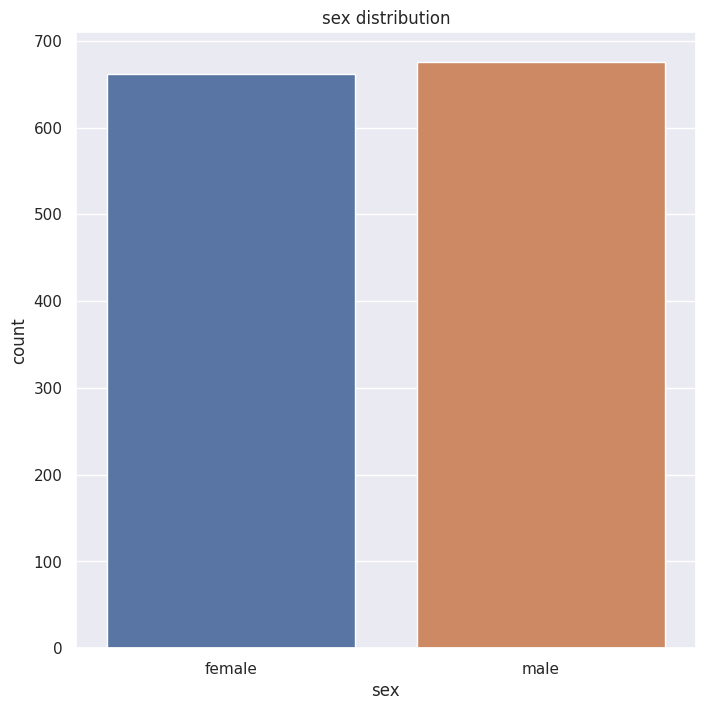

In [15]:

plt.figure(figsize=(8,8))
sns.countplot(x='sex',data=medical_insurance)
plt.title('sex distribution')
plt.show()

In [16]:
medical_insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 800x800 with 0 Axes>

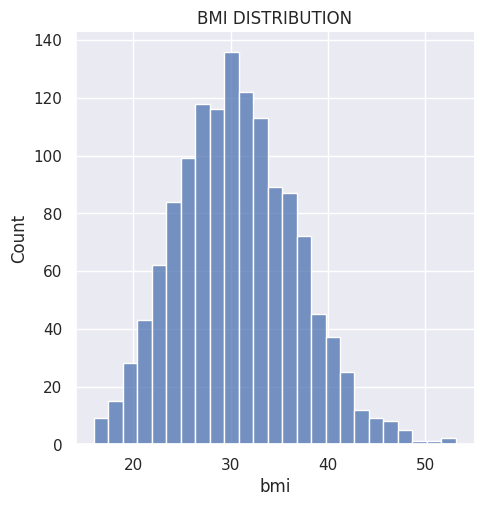

In [17]:
plt.figure(figsize=(8,8))
sns.displot(medical_insurance['bmi'])
plt.title('BMI DISTRIBUTION')
plt.show()

<Figure size 800x800 with 0 Axes>

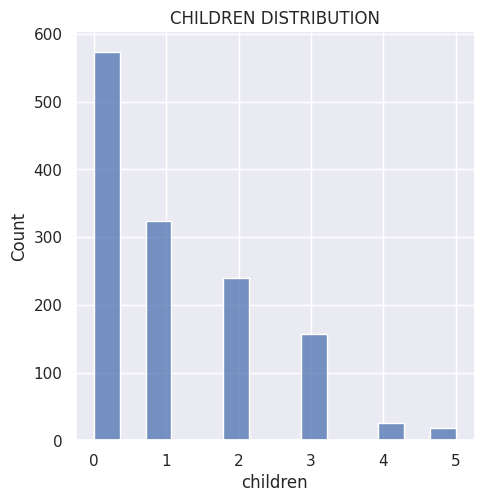

In [18]:
plt.figure(figsize=(8,8))
sns.displot(medical_insurance['children'])
plt.title('CHILDREN DISTRIBUTION')
plt.show()

In [19]:
medical_insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

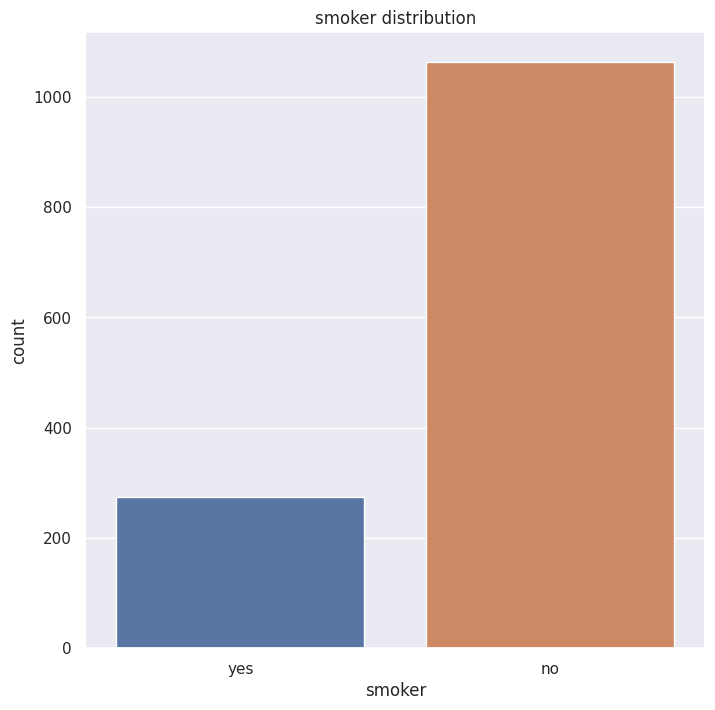

In [21]:

plt.figure(figsize=(8,8))
sns.countplot(x='smoker',data=medical_insurance)
plt.title('smoker distribution')
plt.show()

In [22]:
medical_insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

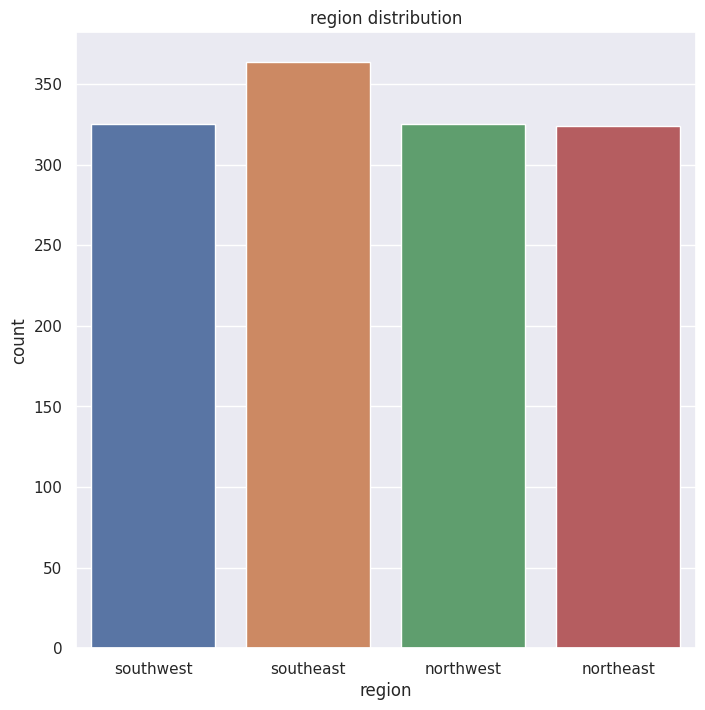

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(x='region',data=medical_insurance)
plt.title('region distribution')
plt.show()

In [24]:
medical_insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-26-d74460d5df62>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_insurance['charges'])


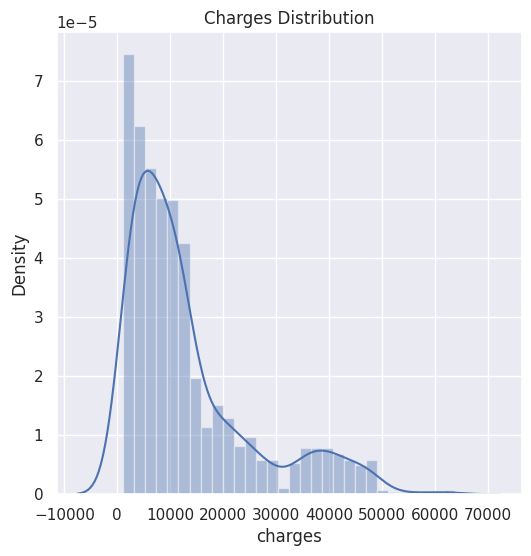

In [26]:
plt.figure(figsize=(6,6))
sns.distplot(medical_insurance['charges'])
plt.title('Charges Distribution')
plt.show()

In [28]:
medical_insurance.replace({'sex':{'male':0,'female':1}},inplace=True)
medical_insurance.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
medical_insurance.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [30]:
X = medical_insurance.drop(columns='charges', axis=1)
Y = medical_insurance['charges']

In [31]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [34]:
regressor = LinearRegression()

In [36]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [37]:
training_data_prediction =regressor.predict(X_train)

In [38]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [39]:



test_data_prediction =regressor.predict(X_test)

In [40]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [41]:
input_data = (31,1,25.74,0,1,0)


In [42]:
input_data_as_numpy_array = np.asarray(input_data)

In [43]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [44]:
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
